In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd

In [2]:
df = pd.read_csv("cna_FINAL.csv")
df2 = df[['clean_text']]

df2.head(5)
df2.info()

,clean_text
0,london :seven-time winners ac milan reached th...
1,munich :bayern munich forward eric-maxim choup...
2,london: chelsea's guro reiten scored from the ...
3,london: ac milan can dare to dream about going...
4,london: antonio conte's dismal record in the c...


In [3]:
# i=0
# for index, row in df2.iterrows():
#     if i > len(df2):
#        break
#     else:
#        f = open(str(i)+'.txt', 'w', encoding='utf-8')
#        f.write(row[0])
#        f.close()
#        i+=1

In [4]:
import preprocess2
cna_corpus = preprocess2.load_corpus('./cnatext')
cna_docs = preprocess2.corpus2docs(cna_corpus)

import gensim
sg_dictionary = gensim.corpora.Dictionary(cna_docs)
sg_vecs = preprocess2.docs2vecs(cna_docs, sg_dictionary)

In [6]:
sg_lda = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=5, random_state=20)


In [7]:
topics = sg_lda.show_topics(5, 5) #5 topics and top 5 most frequent words

for i in range(0, 5):
    print(topics[i])

(0, '0.006*"team" + 0.005*"league" + 0.004*"side" + 0.004*"game" + 0.004*"united"')
(1, '0.004*"back" + 0.004*"win" + 0.004*"open" + 0.003*"players" + 0.003*"team"')
(2, '0.004*"team" + 0.004*"cup" + 0.003*"match" + 0.003*"game" + 0.003*"back"')
(3, '0.007*"cup" + 0.005*"team" + 0.005*"league" + 0.004*"time" + 0.004*"season"')
(4, '0.005*"league" + 0.005*"cup" + 0.005*"players" + 0.005*"team" + 0.004*"win"')


In [10]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [11]:
visual= gensimvis.prepare(sg_lda, sg_vecs, sg_dictionary)

C:\Users\jamie\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [12]:
pyLDAvis.save_html(visual, "topic_viz.html")

In [13]:
# Compute Perplexity
perplex= sg_lda.log_perplexity(sg_vecs, total_docs=None)


In [14]:
print('\nPerplexity for LDAModel: ', perplex)



Perplexity for LDAModel:  -8.67118381044545


In [15]:
# Compute Coherence
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=sg_lda, texts=cna_docs, dictionary=sg_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)


Coherence Score LDAModel:  0.40122991725922025


In [16]:
# Perplexity lower better
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
perplexity_values = []
model_topics = []

for num_topics in range(2, 21, 1):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics, random_state=20)
    #sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=sg_vecs, num_topics=no_topics, id2word=sg_dictionary)
    perplex= sg_lda_x.log_perplexity(sg_vecs, total_docs=None)
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    perplexity_values.append(perplex)
    print("#Topics: " + str(num_topics) + " Score: " + str(perplex))

print(datetime.datetime.now())

2023-04-03 23:13:51.495713
#Topics: 2 Score: -8.270172463708683
#Topics: 3 Score: -8.39908930876653
#Topics: 4 Score: -8.539123763812608
#Topics: 5 Score: -8.671155667938402
#Topics: 6 Score: -8.772956675296545
#Topics: 7 Score: -8.88799403919393
#Topics: 8 Score: -9.001144735768964
#Topics: 9 Score: -9.125839466005113
#Topics: 10 Score: -9.233183352709851
#Topics: 11 Score: -9.334457423739826
#Topics: 12 Score: -9.474109872515712
#Topics: 13 Score: -9.589828977784208
#Topics: 14 Score: -9.696498129782338
#Topics: 15 Score: -9.757276222188775
#Topics: 16 Score: -9.875435766427461
#Topics: 17 Score: -9.95683545757726
#Topics: 18 Score: -10.038640657615984
#Topics: 19 Score: -10.17357632312988
#Topics: 20 Score: -10.228908585955871
2023-04-03 23:13:57.702765


In [17]:
# Coherence higher better
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 21, 1):
    sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics, random_state=20)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=cna_docs, dictionary=sg_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2023-04-03 23:13:57.710425
#Topics: 2 Score: 0.36083549460045994
#Topics: 3 Score: 0.36053114115179113
#Topics: 4 Score: 0.39111056349699136
#Topics: 5 Score: 0.40122991725922025
#Topics: 6 Score: 0.37456498772871233
#Topics: 7 Score: 0.3701527103013383
#Topics: 8 Score: 0.3653258440860079
#Topics: 9 Score: 0.3675343941255129
#Topics: 10 Score: 0.3642228092113274
#Topics: 11 Score: 0.36190795590246444
#Topics: 12 Score: 0.3490770316761482
#Topics: 13 Score: 0.3690596411004131
#Topics: 14 Score: 0.35869477821105583
#Topics: 15 Score: 0.35810114231949103
#Topics: 16 Score: 0.35694298337691915
#Topics: 17 Score: 0.3685436344650044
#Topics: 18 Score: 0.35080254350710516
#Topics: 19 Score: 0.34240934621379654
#Topics: 20 Score: 0.34665545634434797
2023-04-03 23:18:15.296613


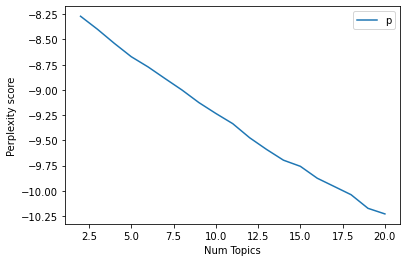

In [18]:
# Show graph for perplexity

import matplotlib.pyplot as plt

limit=21; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [19]:
# Print the perplexity scores
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has Perplexity Value of", round(cv, 4))

Num Topics = 2  has Perplexity Value of -8.2702
Num Topics = 3  has Perplexity Value of -8.3991
Num Topics = 4  has Perplexity Value of -8.5391
Num Topics = 5  has Perplexity Value of -8.6712
Num Topics = 6  has Perplexity Value of -8.773
Num Topics = 7  has Perplexity Value of -8.888
Num Topics = 8  has Perplexity Value of -9.0011
Num Topics = 9  has Perplexity Value of -9.1258
Num Topics = 10  has Perplexity Value of -9.2332
Num Topics = 11  has Perplexity Value of -9.3345
Num Topics = 12  has Perplexity Value of -9.4741
Num Topics = 13  has Perplexity Value of -9.5898
Num Topics = 14  has Perplexity Value of -9.6965
Num Topics = 15  has Perplexity Value of -9.7573
Num Topics = 16  has Perplexity Value of -9.8754
Num Topics = 17  has Perplexity Value of -9.9568
Num Topics = 18  has Perplexity Value of -10.0386
Num Topics = 19  has Perplexity Value of -10.1736
Num Topics = 20  has Perplexity Value of -10.2289


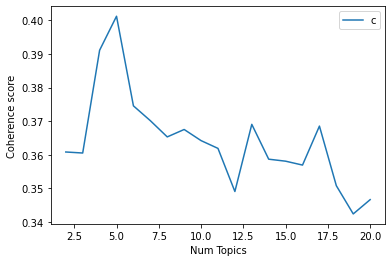

In [20]:
# Show graph for coherence

import matplotlib.pyplot as plt

limit=21; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3608
Num Topics = 3  has Coherence Value of 0.3605
Num Topics = 4  has Coherence Value of 0.3911
Num Topics = 5  has Coherence Value of 0.4012
Num Topics = 6  has Coherence Value of 0.3746
Num Topics = 7  has Coherence Value of 0.3702
Num Topics = 8  has Coherence Value of 0.3653
Num Topics = 9  has Coherence Value of 0.3675
Num Topics = 10  has Coherence Value of 0.3642
Num Topics = 11  has Coherence Value of 0.3619
Num Topics = 12  has Coherence Value of 0.3491
Num Topics = 13  has Coherence Value of 0.3691
Num Topics = 14  has Coherence Value of 0.3587
Num Topics = 15  has Coherence Value of 0.3581
Num Topics = 16  has Coherence Value of 0.3569
Num Topics = 17  has Coherence Value of 0.3685
Num Topics = 18  has Coherence Value of 0.3508
Num Topics = 19  has Coherence Value of 0.3424
Num Topics = 20  has Coherence Value of 0.3467


In [22]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[2] where the number of topics is 6

df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[3], corpus=sg_vecs, data=cna_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


C:\Users\jamie\AppData\Local\Temp\ipykernel_12036\1924270826.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\jamie\AppData\Local\Temp\ipykernel_12036\1924270826.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.7796,"cup, team, league, time, season, united, coach...","[london, winners, ac, milan, reached, champion..."
1,1,3,0.8761,"cup, team, league, time, season, united, coach...","[munich, bayern, munich, forward, scored, form..."
2,2,2,0.6423,"team, cup, match, game, back, athletes, next, ...","[alberta, explore, bid, host, commonwealth, ga..."
3,3,0,0.9963,"team, league, side, game, united, home, second...","[lisbon, clinical, benfica, thrashed, club, br..."
4,4,4,0.9942,"league, cup, players, team, win, time, coach, ...","[london, ac, milan, affected, weekend, serie, ..."
5,5,2,0.9948,"team, cup, match, game, back, athletes, next, ...","[aston, martin, driver, lance, stroll, detaile..."
6,6,4,0.9926,"league, cup, players, team, win, time, coach, ...","[london, second, tier, english, side, watford,..."
7,7,2,0.9964,"team, cup, match, game, back, athletes, next, ...","[uefa, refund, liverpool, fans, attended, cham..."
8,8,1,0.6923,"back, win, open, players, team, time, play, se...","[reliability, top, concern, ferrari, boss, fre..."
9,9,0,0.6318,"team, league, side, game, united, home, second...","[tottenham, hotspur, boss, antonio, conte, und..."


In [23]:
sg_lda_sav=model_list[3] 

sg_lda_sav.save("model_5Topics")

lda_disk=gensim.models.ldamodel.LdaModel.load("model_5Topics")

In [24]:
import pandas as pd

vec=sg_lda_sav[sg_vecs]
pd.DataFrame(vec).to_csv("doc_topic_mixture.csv")

In [26]:
top_words_per_topic = []
for t in range(sg_lda_sav.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in sg_lda_sav.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
